In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv(city_data_to_load)
ride_data = pd.read_csv(ride_data_to_load)
city_data.head()
ride_data.head()

# Combine the data into a single dataset
all_data = pd.merge(ride_data,city_data, how='outer', on="city")

# Display the data table for preview
all_data.head()


,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban


## Bubble Plot of Ride Sharing Data

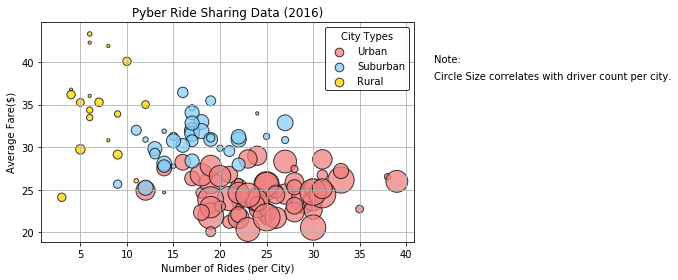

In [6]:
# Obtain the x and y coordinates for each of the three city types
all_data_groupby_city = all_data.groupby('city')
all_data_groupby_city.count()
driver_count = all_data_groupby_city['driver_count'].mean()
driver_count
total_number_of_rides_per_city = all_data_groupby_city['ride_id'].count()
total_number_of_rides_per_city
average_fair_of_rides_per_city = all_data_groupby_city['fare'].mean()
average_fair_of_rides_per_city
city_types = city_data.set_index('city')['type']
city_types

graph_data = pd.DataFrame({
    "Number_of_rides":total_number_of_rides_per_city,
    "Average Fair": average_fair_of_rides_per_city,
    "Driver Count": driver_count,
    "City Type": city_types
})

graph_data.head()

# Build the scatter plots for each city types
urban_df = graph_data.loc[(graph_data["City Type"] == "Urban")]
urban_df
suburban_df = graph_data.loc[(graph_data["City Type"] == "Suburban")]
suburban_df
rural_df = graph_data.loc[(graph_data["City Type"] == "Rural")]
rural_df

plt.scatter(urban_df['Number_of_rides'], urban_df['Average Fair'], s = urban_df['Driver Count']*10, color = '#F08080', edgecolor = 'black', label = 'Urban', alpha = .75)
plt.scatter(suburban_df['Number_of_rides'], suburban_df['Average Fair'], s = suburban_df['Driver Count']*10, color = '#87CEFA', edgecolor = 'black', label = 'Suburban', alpha = .75)
plt.scatter(rural_df['Number_of_rides'], rural_df['Average Fair'], s = rural_df['Driver Count']*10, color = '#FFD700', edgecolor = 'black', label = 'Rural', alpha = .75)

# Incorporate the other graph properties
plt.title('Pyber Ride Sharing Data (2016)')
plt.xlabel('Number of Rides (per City)')
plt.ylabel('Average Fare($)')

# Create a legend
# plt.legend(loc="best")
# title="Legend", fancybox=True
legend = plt.legend( edgecolor = 'black',fancybox=True, title='City Types')
legend.legendHandles[0]._sizes = [75]
legend.legendHandles[1]._sizes = [75]
legend.legendHandles[2]._sizes = [75]

# Incorporate a text label regarding circle size
plt.text(43, 40, 'Note:')
plt.text(43, 38, 'Circle Size correlates with driver count per city.')
plt.grid(True)

# Save Figure
plt.tight_layout()
plt.savefig('Images/PyberRideSharingData.png')
plt.show()

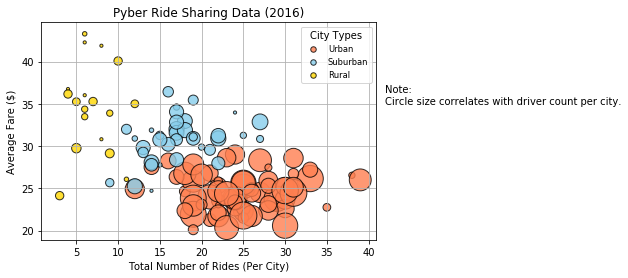

In [3]:
# Show plot
plt.show()

## Total Fares by City Type

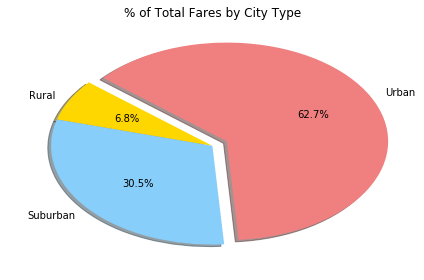

In [7]:
# Calculate Type Percents
urban_pcnt = all_data.loc[(all_data["type"] == "Urban")]['fare'].sum() / ride_data['fare'].sum() * 100 
# urban_count()
# suburban_df.count()
suburban_pcnt = all_data.loc[(all_data["type"] == "Suburban")]['fare'].sum() / ride_data['fare'].sum() * 100 
# rural_df.count()
rural_pcnt = all_data.loc[(all_data["type"] == "Rural")]['fare'].sum() / ride_data['fare'].sum() * 100

# Build Pie Chart
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Rural', 'Suburban' , 'Urban' 
sizes = [rural_pcnt, suburban_pcnt, urban_pcnt]
explode = (0, 0, 0.1)  # only "explode" the 1st slice (i.e. 'Urban')
colors = ['#FFD700','#87CEFA', '#F08080']

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', colors=colors,
        shadow=True, startangle=140)
# ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title('% of Total Fares by City Type')

# Save Figure
plt.tight_layout()
plt.savefig('Images/PCNTOfTotalFaresByCityType.png')
plt.show()


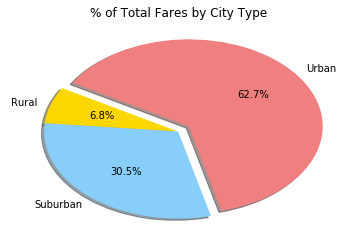

In [4]:
# Show Figure
plt.show()

## Total Rides by City Type

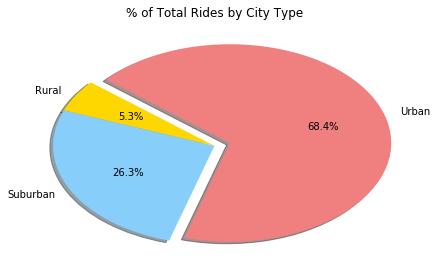

In [8]:
# Calculate Ride Percents

# Build Pie Chart

# Save Figure


# Calculate Type Percents
urban_pcnt = all_data.loc[(all_data["type"] == "Urban")]['ride_id'].count() / ride_data['ride_id'].count() * 100 
# suburban_df.count()
suburban_pcnt = all_data.loc[(all_data["type"] == "Suburban")]['ride_id'].count() / ride_data['ride_id'].count() * 100 
# rural_df.count()
rural_pcnt = all_data.loc[(all_data["type"] == "Rural")]['ride_id'].count() / ride_data['ride_id'].count() * 100

# Build Pie Chart
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Rural', 'Suburban' , 'Urban' 
sizes = [rural_pcnt, suburban_pcnt, urban_pcnt]
explode = (0, 0, 0.1)  # only "explode" the 1st slice (i.e. 'Urban')
colors = ['#FFD700','#87CEFA', '#F08080']

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', colors=colors,
        shadow=True, startangle=140)
# ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title('% of Total Rides by City Type')

# Save Figure
plt.tight_layout()
plt.savefig('Images/PCNTOfTotalRidesByCityType.png')
plt.show()


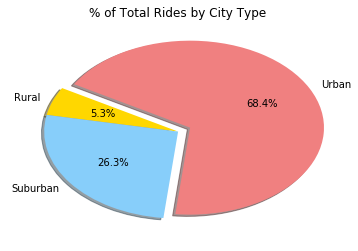

In [5]:
# Show Figure
plt.show()

## Total Drivers by City Type

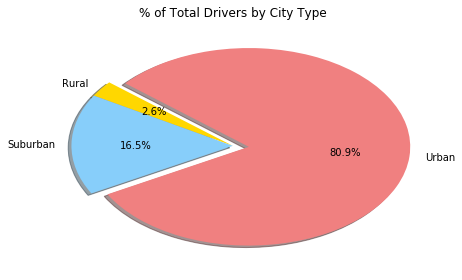

In [9]:
# Calculate Driver Percents

# Build Pie Charts

# Save Figure

# Calculate Type Percents
urban_pcnt = city_data.loc[(city_data["type"] == "Urban")]['driver_count'].sum() / city_data['driver_count'].sum() * 100 
suburban_pcnt = city_data.loc[(city_data["type"] == "Suburban")]['driver_count'].sum() / city_data['driver_count'].sum() * 100 
rural_pcnt = city_data.loc[(city_data["type"] == "Rural")]['driver_count'].sum() / city_data['driver_count'].sum() * 100 

# Build Pie Chart
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Rural', 'Suburban' , 'Urban' 
sizes = [rural_pcnt, suburban_pcnt, urban_pcnt]
explode = (0, 0, 0.1)  # only "explode" the 1st slice (i.e. 'Urban')
colors = ['#FFD700','#87CEFA', '#F08080']

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', colors=colors,
        shadow=True, startangle=140)
# ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
2375
plt.title('% of Total Drivers by City Type')

# Save Figure
plt.tight_layout()
plt.savefig('Images/PCNTOfTotalDriversByCityType.png')
plt.show()


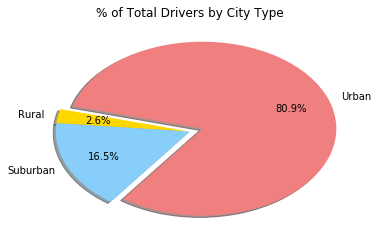

In [6]:
# Show Figure
plt.show()